In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve


Load dataset

In [2]:
df = pd.read_csv('cleaned_sephora_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Columns: 150 entries, loves_count to tertiary_category_Unknown
dtypes: bool(134), float64(8), int64(8)
memory usage: 2.1 MB


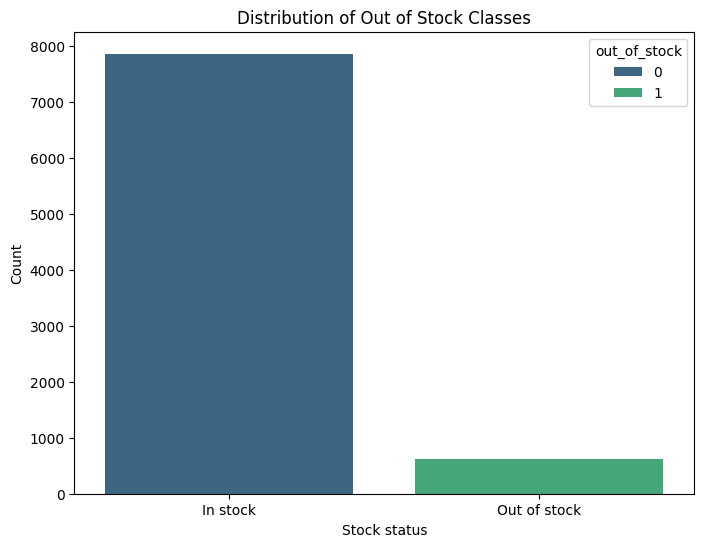

In [4]:
# Plot the distribution of classes in the 'out_of_stock' column
plt.figure(figsize=(8, 6))
sns.countplot(x='out_of_stock', data=df, palette='viridis', hue='out_of_stock')
plt.title('Distribution of Out of Stock Classes')
plt.xlabel('Stock status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['In stock', 'Out of stock'])
plt.show()

# Data Preprocessing

## Feature selection

In [5]:
# Select features
features = ['reviews', 'loves_count', 'rating', 'price_usd','out_of_stock_rate_tertiary', 
            'price_bins', 'online_only', 'sephora_exclusive', 'limited_edition', 'out_of_stock_rate']
X = df[features]

# Select the target column
y = df['out_of_stock']

## Standardization of numerical columns

In [6]:
# Select the numeric columns to scale
numeric_columns = ['price_usd', 'reviews', 'loves_count']

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the selected numeric columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

/tmp/ipykernel_23857/3690464690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


# Split dataset to train and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train_resampled, y_train_resampled)

# Implement Random Forest Classifier

In [10]:
model = RandomForestClassifier(n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    class_weight='balanced',
    random_state=42 )

model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=5, n_estimators=200, random_state=42)

# Make predictions

In [11]:
y_pred = model.predict(x_test)

# Evaluate the model

In [12]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [13]:
print("The random classifier accuracy score is: ", accuracy)

The random classifier accuracy score is:  0.8640376692171866


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1580
           1       0.19      0.29      0.23       119

    accuracy                           0.86      1699
   macro avg       0.57      0.60      0.58      1699
weighted avg       0.89      0.86      0.88      1699



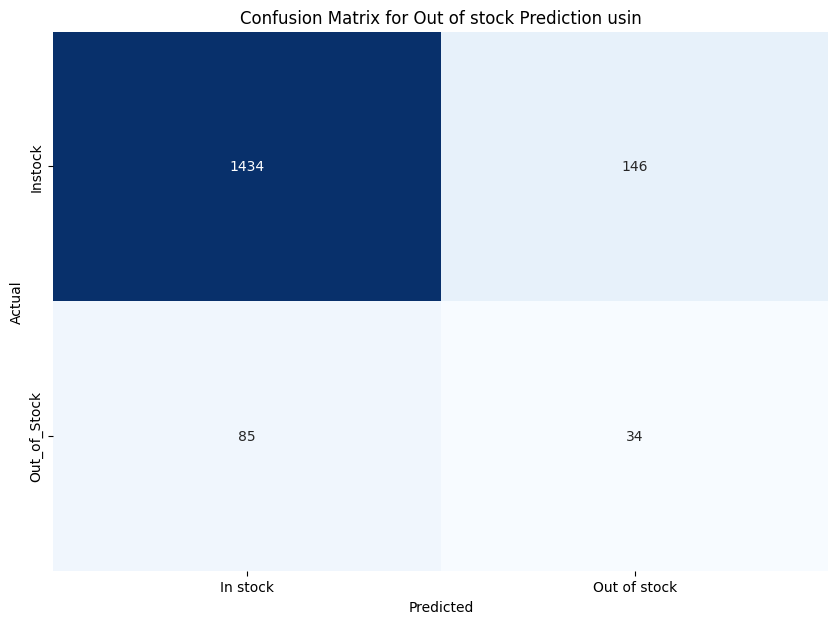

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['In stock', 'Out of stock'], yticklabels=[ 'Instock', 'Out_of_Stock'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Out of stock Prediction usin')
plt.show()